<a href="https://colab.research.google.com/github/Sohan138/git_project/blob/main/Exploratory_Data_Analysis_(EDA)_on_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
sns.set()

data = pd.read_csv('retail_sales_dataset.csv')
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [174]:
data.shape

(1000, 9)

In [152]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [176]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [175]:
data.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [195]:
data['Gender'].value_counts()

Female    510
Male      490
Name: Gender, dtype: int64

<Axes: ylabel='Gender'>

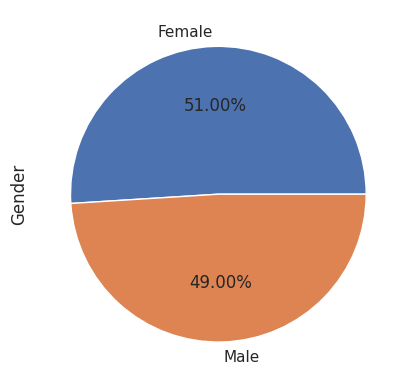

In [179]:
data['Gender'].value_counts().plot(kind='pie',autopct='%.2f%%')


In [180]:
pd.crosstab(data['Gender'],data['Product Category'])

Product Category,Beauty,Clothing,Electronics
Gender,,,
Female,166,174,170
Male,141,177,172


In [181]:
pd.crosstab(data['Gender'],data['Quantity'])

Quantity,1,2,3,4
Gender,,,,
Female,125,120,127,138
Male,128,123,114,125


In [182]:
pd.crosstab(data['Product Category'],data['Quantity'])

Quantity,1,2,3,4
Product Category,,,,
Beauty,74,75,85,73
Clothing,88,80,86,97
Electronics,91,88,70,93


In [183]:
pd.crosstab(data['Gender'],data['Price per Unit'])

Price per Unit,25,30,50,300,500
Gender,,,,,
Female,115,92,98,106,99
Male,95,91,113,91,100


In [184]:
# adding 'Month' column

data['Date'] = pd.to_datetime(data['Date'])
data['month'] = data['Date'].dt.month_name()
data['month'].head()

0    November
1    February
2     January
3         May
4         May
Name: month, dtype: object

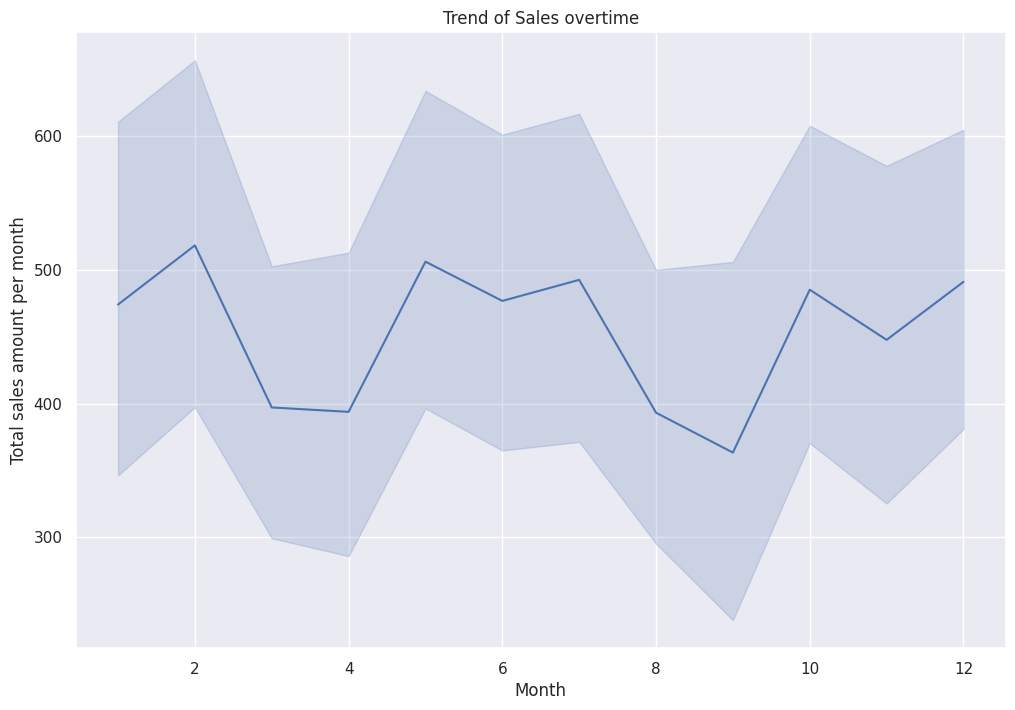

In [196]:
# Exploratory DATA Analysis
# Showing the Trend of Sales Overtime

plt.figure(figsize=(12,8))
sns.lineplot(x='month',y='Total Amount',data=data)
plt.title('Trend of Sales overtime')
plt.xlabel('Month')
plt.ylabel('Total sales amount per month')
plt.show()

In [186]:
# finding Transaction frequency with month
data['month'] = data['Date'].dt.month
transection = data.groupby('month')['Transaction ID'].count()

In [165]:
transection

month
1      78
2      85
3      73
4      86
5     105
6      77
7      72
8      94
9      65
10     96
11     78
12     91
Name: Transaction ID, dtype: int64

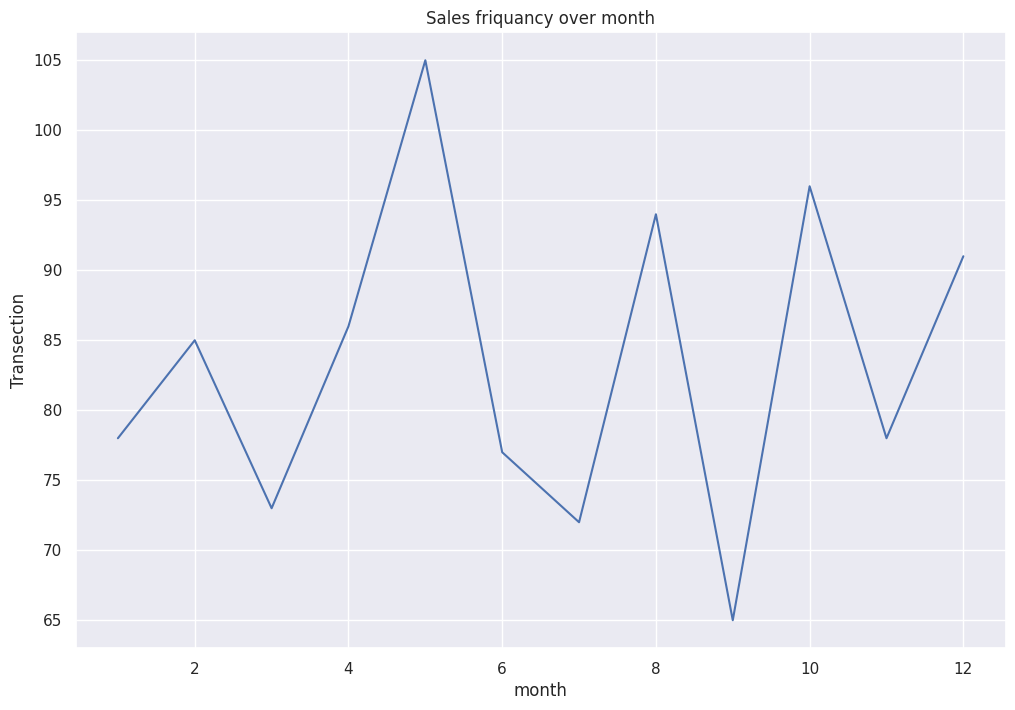

In [187]:
plt.figure(figsize=(12,8))
sns.lineplot(x=transection.index,y=transection.values)
plt.title('Sales friquancy over month')
plt.xlabel('month')
plt.ylabel('Transection')
plt.show()

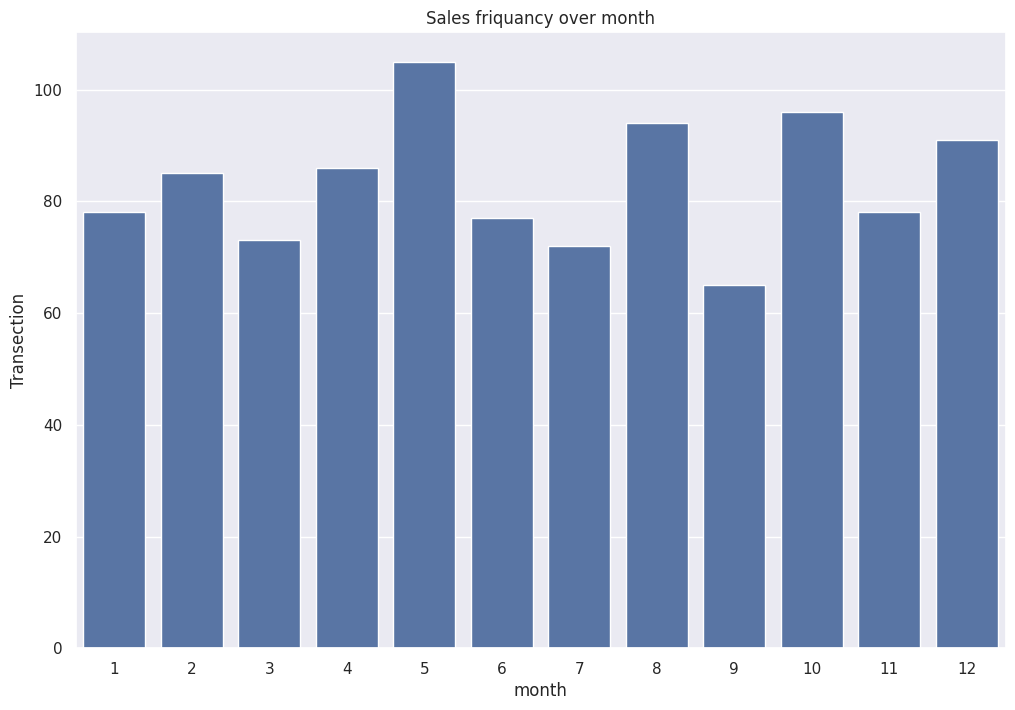

In [188]:
plt.figure(figsize=(12,8))
sns.barplot(x=transection.index,y=transection.values)
plt.title('Sales friquancy over month')
plt.xlabel('month')
plt.ylabel('Transection')
plt.show()

In [189]:
#Sales Of diffrent Product Categories

col = 'Product Category'
i = data[col].value_counts().index
v = data[col].value_counts().values

#pie plot
fig = px.pie(names=i, values=v, height=350,width=700,color=i)
fig.update_layout(paper_bgcolor='#A9DFBF')
fig.update_traces(showlegend=False)
fig.update_layout(title=dict(text=f"Pie Plot of {col}", x=0.5, font=dict(size=25)))
fig.update_traces(textinfo='text+percent+label', textfont_color='white',textfont_size=14)
fig.show()

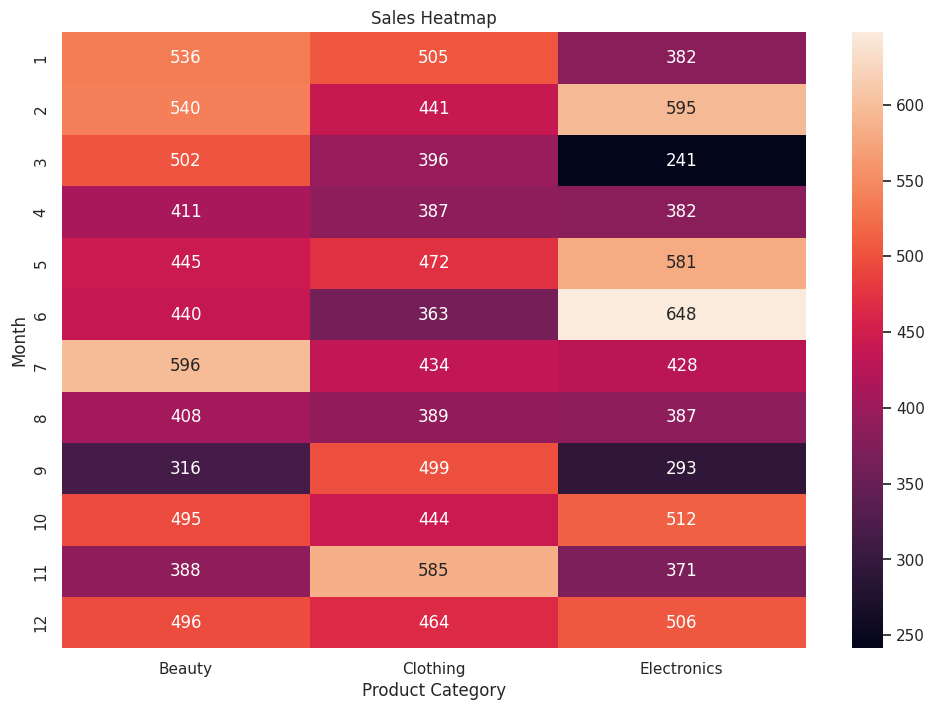

In [190]:
heatmap = data.pivot_table(index='month', columns='Product Category', values='Total Amount')
plt.figure(figsize=(12,8))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title('Sales Heatmap')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.show()

In [191]:
# Dividing Age Category
age_bins = [0, 18, 25, 35, 50, 100]
age_group = ['0-18', '19-25', '26-35', '36-50', '50+']
data['Age Group'] = pd.cut(data['Age'], bins = age_bins, labels=age_group)
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,month,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,36-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,36-50
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,26-35


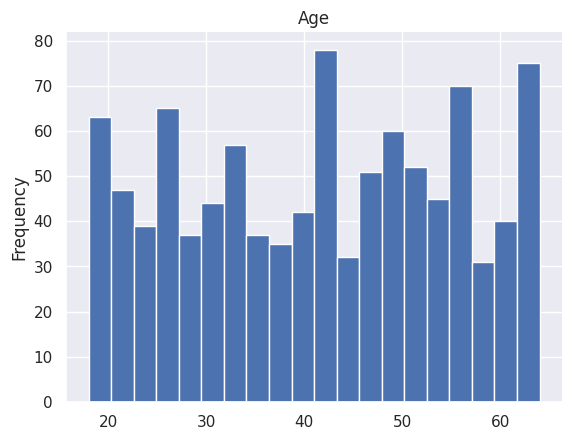

In [192]:
# @title Age

from matplotlib import pyplot as plt
data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

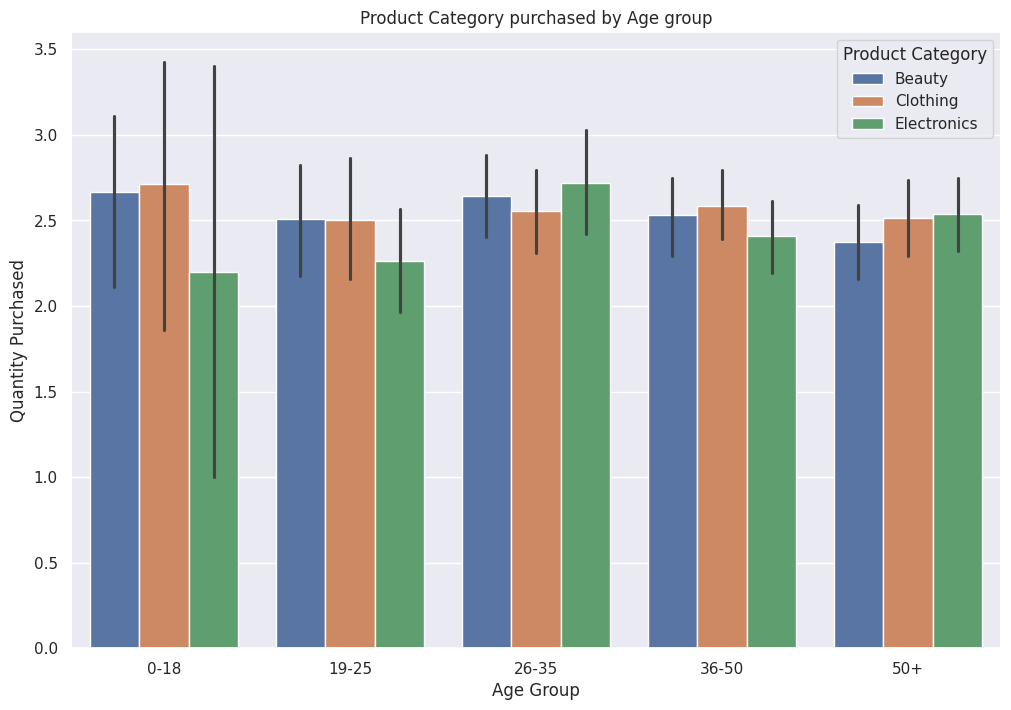

In [193]:
# bar plot
plt.figure(figsize=(12,8))
sns.barplot(x='Age Group', y='Quantity', hue= 'Product Category', data=data)
plt.title('Product Category purchased by Age group')
plt.xlabel('Age Group')
plt.ylabel('Quantity Purchased')
plt.show()

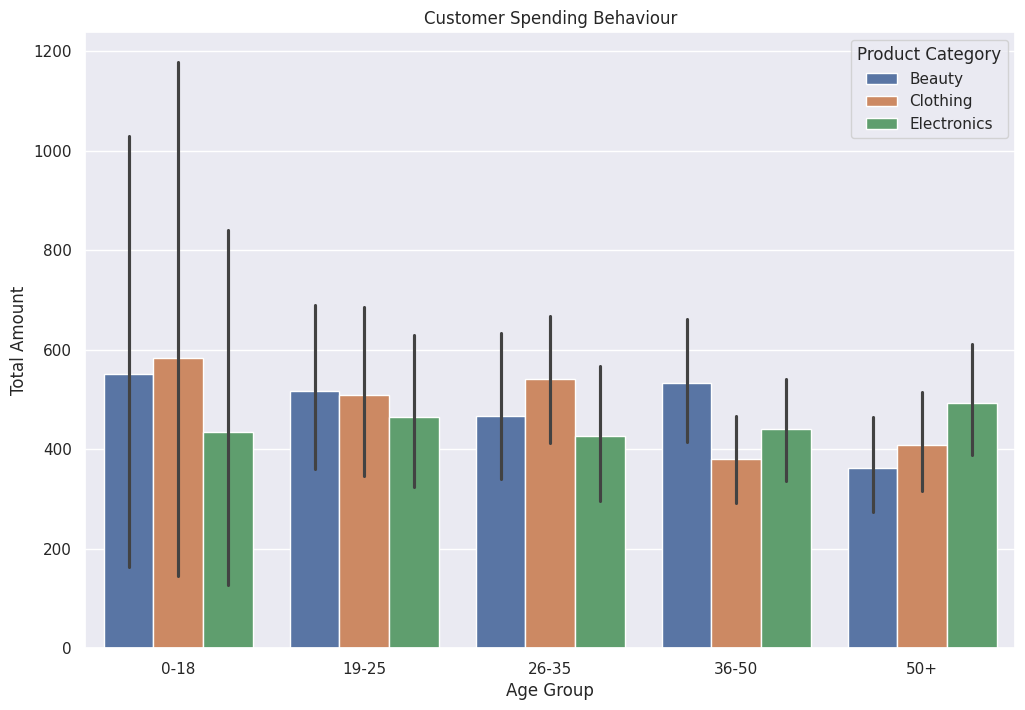

In [194]:
plt.figure(figsize=(12,8))
sns.barplot(x='Age Group', y='Total Amount', hue='Product Category', data=data)
plt.title('Customer Spending Behaviour')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()